# Notebook 2 - Teste de Qualidade


In [10]:
import numpy as np
import pandas as pd
from random import sample
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import openpyxl

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 400)

In [11]:
mri_areas = pd.read_csv("/home/brunovieira/Tamires_Experiments/Bases_de_Dados/MRI_Data_Areas_890.csv")
mri_areas = mri_areas.rename(columns={'Unnamed: 0':'participant'})
mri_areas.participant = [x[:-2] for x in mri_areas.participant]
mri_areas

,participant,hemisphere,2_NumVert,2_SurfArea,2_GrayVol,2_ThickAvg,2_ThickStd,2_MeanCurv,2_GausCurv,2_FoldInd,...,34_CurvInd,35_NumVert,35_SurfArea,35_GrayVol,35_ThickAvg,35_ThickStd,35_MeanCurv,35_GausCurv,35_FoldInd,35_CurvInd
0,A00008326,lh,1003.0,659.0,1763.0,2.602,0.465,0.138,0.022,15.0,...,0.4,2271.0,1520.0,4672.0,3.007,0.696,0.111,0.026,22.0,2.2
1,A00008326,rh,716.0,446.0,1277.0,2.865,0.670,0.147,0.017,14.0,...,0.2,2305.0,1550.0,4753.0,2.993,0.757,0.112,0.025,19.0,2.1
2,A00008399,lh,1491.0,1018.0,3486.0,3.063,0.594,0.123,0.021,17.0,...,0.8,3171.0,2070.0,7382.0,3.503,0.691,0.105,0.022,25.0,2.7
3,A00008399,rh,1520.0,1016.0,3177.0,2.670,0.901,0.134,0.024,27.0,...,0.4,3111.0,2073.0,7652.0,3.514,0.699,0.107,0.022,25.0,2.5
4,A00010893,lh,1230.0,823.0,2625.0,3.040,0.556,0.126,0.026,15.0,...,0.8,2319.0,1554.0,5321.0,3.315,0.766,0.102,0.022,16.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,A00073953,rh,1150.0,744.0,1778.0,2.294,0.669,0.147,0.022,23.0,...,0.3,2893.0,1917.0,5554.0,2.960,0.670,0.120,0.030,45.0,3.3
1777,A00074000,lh,1533.0,1009.0,2863.0,2.808,0.653,0.137,0.023,22.0,...,0.7,2856.0,1914.0,6051.0,3.198,0.580,0.109,0.025,22.0,2.7
1778,A00074000,rh,1125.0,739.0,1930.0,2.403,0.775,0.136,0.021,16.0,...,0.4,2957.0,1969.0,6441.0,3.333,0.633,0.109,0.023,22.0,2.8
1779,A00074034,lh,1596.0,1080.0,3746.0,3.409,0.695,0.130,0.022,23.0,...,0.5,2608.0,1875.0,6772.0,3.469,0.737,0.116,0.028,25.0,2.9


In [8]:
#for col in mri_areas.columns[2:]:
#    plt.hist(mri_areas[col])
#    plt.title(col)
#    plt.show()

In [9]:
#fig, ax = plt.subplots(31,9, figsize=(50,100), dpi=500)
#for i in range(31):
#    for j in range(9):
#        col = mri_areas.columns[i*j]
#        ax[i,j].hist(mri_areas[col])
#        ax[i,j].set_title(col)
#plt.savefig('quality assessment.png')
#plt.show()

In [13]:
threshold_std = 4
mri_areas_std = mri_areas.copy()
for col in mri_areas.columns[2:]:
    mean = np.mean(mri_areas[col])
    std = np.std(mri_areas[col])
    lower = mean - threshold_std*std
    upper = mean + threshold_std*std
    mri_areas_std[col] = [1 if x < lower or x > upper else 0 for x in mri_areas[col]]
    
mri_areas_std['sum_risks'] = mri_areas_std.sum(axis=1)
mri_areas_std = mri_areas_std[['sum_risks'] + list(mri_areas_std.columns[:-1])]
mri_areas_std[mri_areas_std.sum_risks>0].sort_values(by=['sum_risks'],ascending=False)

/tmp/ipykernel_13542/3241732983.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mri_areas_std['sum_risks'] = mri_areas_std.sum(axis=1)


,sum_risks,participant,hemisphere,2_NumVert,2_SurfArea,2_GrayVol,2_ThickAvg,2_ThickStd,2_MeanCurv,2_GausCurv,...,34_CurvInd,35_NumVert,35_SurfArea,35_GrayVol,35_ThickAvg,35_ThickStd,35_MeanCurv,35_GausCurv,35_FoldInd,35_CurvInd
941,47,A00053171,rh,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,46,A00053171,lh,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1279,38,A00059875,lh,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1046,35,A00055262,lh,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1280,32,A00059875,rh,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1,A00055991,rh,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1104,1,A00056020,lh,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369,1,A00037387,lh,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1144,1,A00056679,lh,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([234.,  39.,  17.,   7.,   6.,   3.,   3.,   2.,   4.,   1.,   2.,
          3.,   4.,   2.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([ 1.        ,  2.02222222,  3.04444444,  4.06666667,  5.08888889,
         6.11111111,  7.13333333,  8.15555556,  9.17777778, 10.2       ,
        11.22222222, 12.24444444, 13.26666667, 14.28888889, 15.31111111,
        16.33333333, 17.35555556, 18.37777778, 19.4       , 20.42222222,
        21.44444444, 22.46666667, 23.48888889, 24.51111111, 25.53333333,
        26.55555556, 27.57777778, 28.6       , 29.62222222, 30.64444444,
        31.66666667, 32.68888889, 33.71111111, 34.73333333, 35.75555556,
        36.77777778, 37.8       , 38.82222222, 39.84444444, 40.86666667,
        41.88888889, 42.91111111, 43.93333333, 44.95555556, 45.97777778,
        47.        ]),
 <BarCon

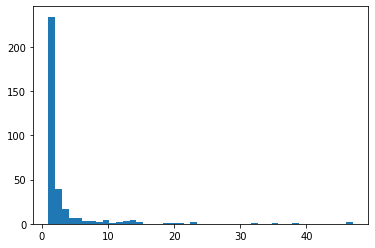

In [14]:
test = mri_areas_std.sum_risks[mri_areas_std.sum_risks !=0]
plt.hist(test, bins = 45)

In [15]:
mri_areas_std[mri_areas_std.participant == 'A00019903']

,sum_risks,participant,hemisphere,2_NumVert,2_SurfArea,2_GrayVol,2_ThickAvg,2_ThickStd,2_MeanCurv,2_GausCurv,...,34_CurvInd,35_NumVert,35_SurfArea,35_GrayVol,35_ThickAvg,35_ThickStd,35_MeanCurv,35_GausCurv,35_FoldInd,35_CurvInd
8,3,A00019903,lh,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
9,5,A00019903,rh,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [16]:
threshold_risks = 5 #acima de 10 elimina
mri_areas_std.participant[mri_areas_std.sum_risks>threshold_risks].unique()

array(['A00030913', 'A00031452', 'A00032008', 'A00032817', 'A00043325',
       'A00050940', 'A00052165', 'A00052560', 'A00052613', 'A00053171',
       'A00055262', 'A00055541', 'A00056419', 'A00058004', 'A00059875',
       'A00060301', 'A00061415', 'A00062361', 'A00062997', 'A00065250',
       'A00066697', 'A00066788', 'A00073545'], dtype=object)

In [17]:
len(mri_areas_std.participant[mri_areas_std.sum_risks>threshold_risks].unique())

23

In [ ]:
['A00031452', 'A00032008', 'A00037483','A00040440', 'A00043325', 
 'A00052613','A00058004', 'A00059344', 'A00059875', 'A00060301', 'A00060429']

In [ ]:
['A00030913', 'A00031452', 'A00032008', 'A00032817', 'A00043325',
       'A00050940', 'A00052165', 'A00052560', 'A00052613', 'A00053171',
       'A00055262', 'A00055541', 'A00056419', 'A00058004', 'A00059875',
       'A00060301', 'A00061415', 'A00062361', 'A00062997', 'A00065250',
       'A00066697', 'A00066788', 'A00073545']